## Завдання: 
Використання технологiї передачi знань для побудови моделi згорткових нейронних мереж в задачi класифiкацiї кольорових зображень CIFAR-10

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.metrics import F1Score, AUC
from tensorflow.keras.callbacks import TensorBoard
from keras.datasets import cifar10
from tensorflow.keras.applications import VGG19, ResNet152, DenseNet201, EfficientNetB7

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

Налаштування TensorBoard для відтворення та завантаження даних про навчання моделі:

In [4]:
!rm -rf ./log/
log_dir = "/home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab5/log"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [5]:
%load_ext tensorboard

#### Підготовка даних:

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

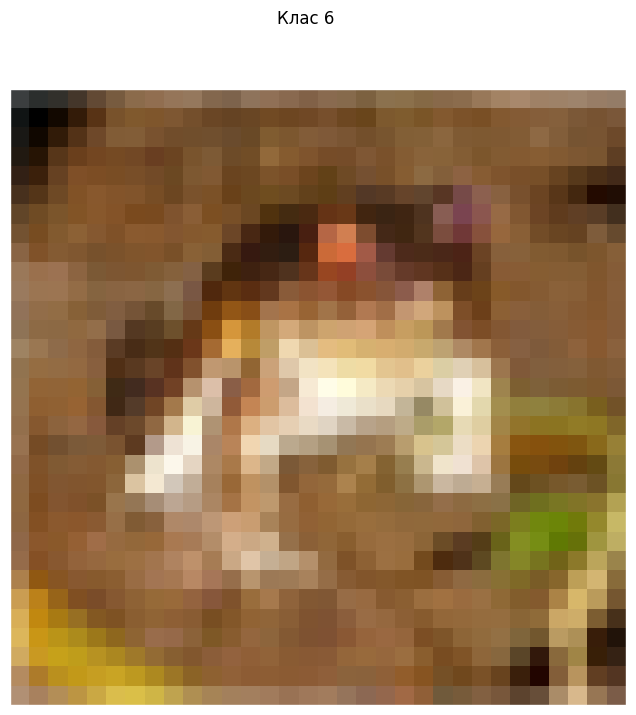

In [11]:
plt.imshow(x_train[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"Клас {y_train[0][0]}")
plt.show()

Перетворення міток класів в one-hot представлення

In [12]:
y_train = utils.to_categorical(y_train, 10)

In [73]:
y_train.shape

(50000, 10)

#### Побудова моделей:

In [13]:
vgg19_model = VGG19(weights='imagenet', input_shape=(32, 32, 3), include_top=False)
resnet152_model = ResNet152(weights='imagenet', input_shape=(32, 32, 3), include_top=False)
densenet201_model = DenseNet201(weights='imagenet', input_shape=(32, 32, 3), include_top=False)
efficientnetb7_model = EfficientNetB7(weights='imagenet', input_shape=(32, 32, 3), include_top=False)

2024-05-02 20:03:51.979982: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-02 20:03:51.980924: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [14]:
def add_top_layer(base_model, layers: tuple, activation:str):
    base_model.trainable = False
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    for layer in layers:
        x = Dense(layer, activation=activation)(x) 
    
    predictions = Dense(10, activation='softmax')(x) 

    new_model = Model(inputs=base_model.input, outputs=predictions)
    
    return new_model

In [15]:
def plot_results():
    fig, axs = plt.subplots(2, 2)

    val_loss = pd.read_csv("val_loss.csv")["Value"]
    train_loss = pd.read_csv("train_loss.csv")["Value"]
    val_acc = pd.read_csv("val_acc.csv")["Value"]
    train_acc = pd.read_csv("train_acc.csv")["Value"]
    val_f1 = pd.read_csv("val_f1.csv")["Value"]
    train_f1 = pd.read_csv("train_f1.csv")["Value"]
    val_auc = pd.read_csv("val_auc.csv")["Value"]
    train_auc = pd.read_csv("train_auc.csv")["Value"]

    axs[0][0].plot(val_loss, marker=".", label="validation")
    axs[0][0].plot(train_loss, marker=".", label="train")
    axs[0][0].set_title("Loss through epochs")
    axs[0][0].legend()

    axs[0][1].plot(val_acc, marker=".", label="validation")
    axs[0][1].plot(train_acc, marker=".", label="train")
    axs[0][1].set_title("Accuracy through epochs")
    axs[0][1].legend()

    axs[1][0].plot(val_f1, marker=".", label="validation")
    axs[1][0].plot(train_f1, marker=".", label="train")
    axs[1][0].set_title("F1-score through epochs")
    axs[1][0].legend()

    axs[1][1].plot(val_auc, marker=".", label="validation")
    axs[1][1].plot(train_auc, marker=".", label="train")
    axs[1][1].set_title("AUC through epochs")
    axs[1][1].legend()

    fig.supxlabel("epoch")

    fig.tight_layout()
    plt.show()

##### VGG19:

In [153]:
vgg19_new_model = add_top_layer(vgg19_model, (1024, 512), "relu")

In [154]:
vgg19_new_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", F1Score(average="weighted"), AUC()])

In [155]:
vgg19_new_model.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.3913 - auc_13: 0.7590 - f1_score: 0.3895 - loss: 6.4486 - val_accuracy: 0.5453 - val_auc_13: 0.9006 - val_f1_score: 0.5413 - val_loss: 1.3329
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.6144 - auc_13: 0.9278 - f1_score: 0.6131 - loss: 1.1207 - val_accuracy: 0.5785 - val_auc_13: 0.9122 - val_f1_score: 0.5765 - val_loss: 1.2543
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.6832 - auc_13: 0.9505 - f1_score: 0.6822 - loss: 0.9299 - val_accuracy: 0.5725 - val_auc_13: 0.9089 - val_f1_score: 0.5687 - val_loss: 1.2954
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.7297 - auc_13: 0.9653 - f1_score: 0.7291 - loss: 0.7807 - val_accuracy: 0.5929 - val_auc_13: 0.9162 - val_f1_score: 0.5909 - val_loss: 1.2517
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.7818 - auc_13: 0.9764 - f1_score: 0.7816 - loss: 0.6457 - val_accuracy: 0.5895 - val_auc_13: 0.9135 - 

Зміна функції втрат та показників якості:

In [156]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab5/log

Reusing TensorBoard on port 6007 (pid 8771), started 1:41:17 ago. (Use '!kill 8771' to kill it.)

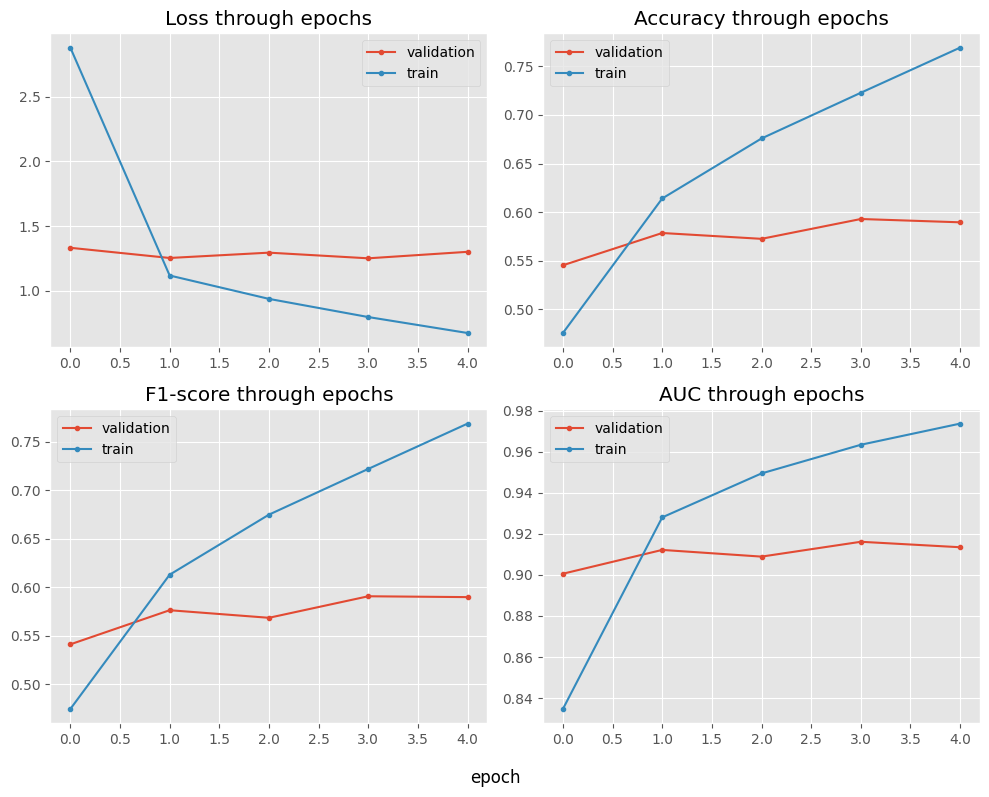

In [157]:
plot_results()

Показники якості на тестовій множині:

In [158]:
y_pred_ = vgg19_new_model.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step


In [159]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.5927
Precision: 0.5982079022469365
Recall: 0.5927
F1-score: 0.5939476692634702
AUC: 0.9148552666666666


Декілька класифікацій зображень:

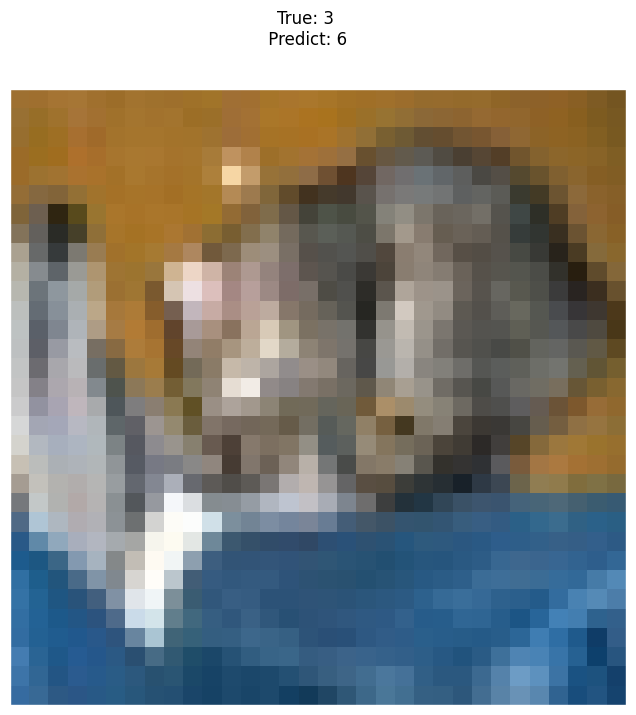

In [160]:
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[0][0]}\n Predict: {y_pred[0]}")
plt.show()

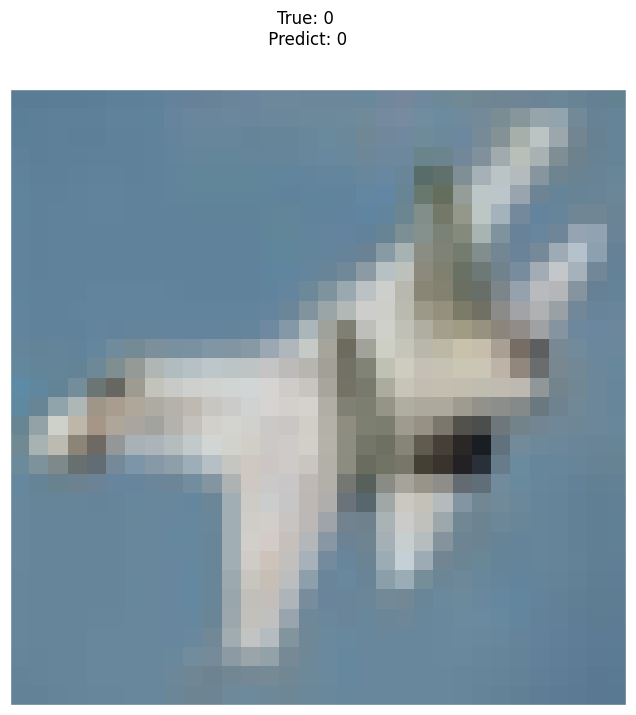

In [161]:
plt.imshow(x_test[10])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[10][0]}\n Predict: {y_pred[10]}")
plt.show()

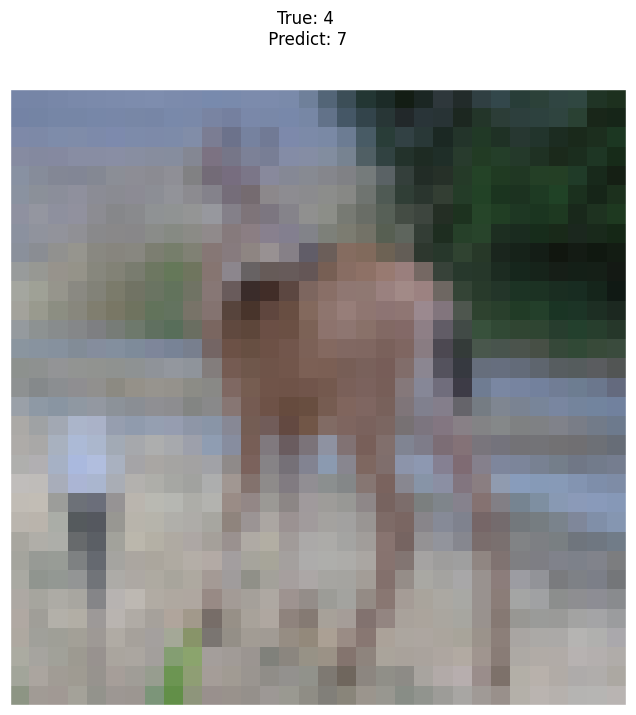

In [162]:
plt.imshow(x_test[100])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[100][0]}\n Predict: {y_pred[100]}")
plt.show()

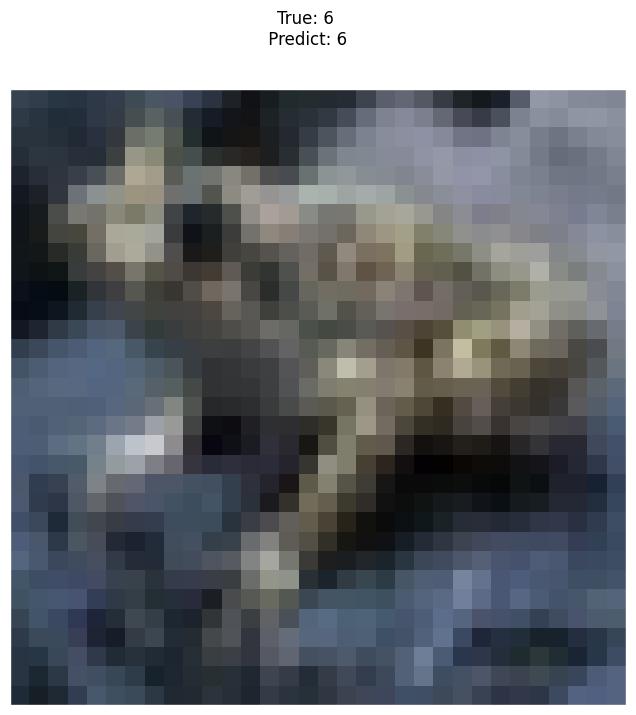

In [163]:
plt.imshow(x_test[152])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[152][0]}\n Predict: {y_pred[152]}")
plt.show()

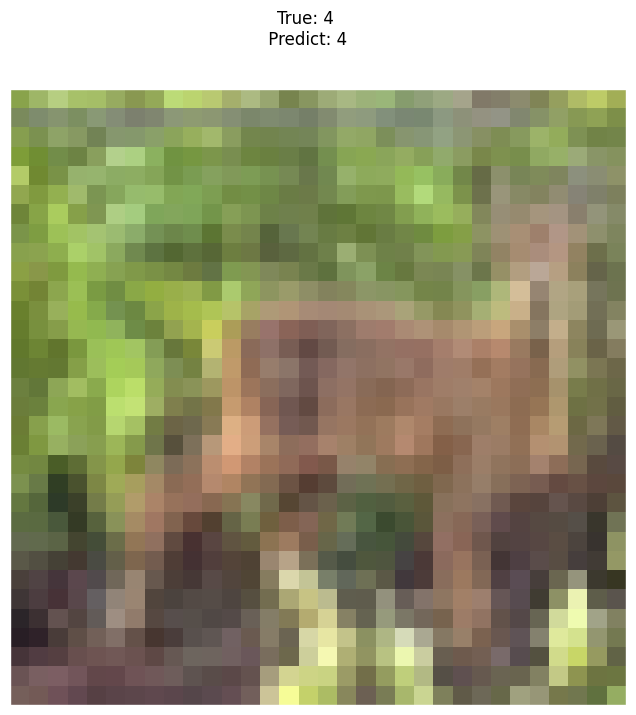

In [164]:
plt.imshow(x_test[2500])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[2500][0]}\n Predict: {y_pred[2500]}")
plt.show()

##### ResNet152:

In [168]:
resnet152_new = add_top_layer(resnet152_model, (1024, 512), "relu")

In [169]:
resnet152_new.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", F1Score(average="weighted"), AUC()])

In [170]:
resnet152_new.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.4345 - auc_15: 0.8144 - f1_score: 0.4322 - loss: 2.2970 - val_accuracy: 0.5720 - val_auc_15: 0.9177 - val_f1_score: 0.5733 - val_loss: 1.2104
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.6366 - auc_15: 0.9405 - f1_score: 0.6356 - loss: 1.0243 - val_accuracy: 0.6067 - val_auc_15: 0.9283 - val_f1_score: 0.6074 - val_loss: 1.1360
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.6898 - auc_15: 0.9571 - f1_score: 0.6892 - loss: 0.8709 - val_accuracy: 0.6102 - val_auc_15: 0.9309 - val_f1_score: 0.6052 - val_loss: 1.1158
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.7438 - auc_15: 0.9699 - f1_score: 0.7432 - loss: 0.7260 - val_accuracy: 0.6047 - val_auc_15: 0.9258 - val_f1_score: 0.6006 - val_loss: 1.1862
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.7815 - auc_15: 0.9784 - f1_score: 0.7811 - loss: 0.6131 - val_accuracy: 0.6099 - val_auc_15: 0.9232 - 

Зміна функції втрат та показників якості:

In [171]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab5/log

Reusing TensorBoard on port 6007 (pid 8771), started 2:00:34 ago. (Use '!kill 8771' to kill it.)

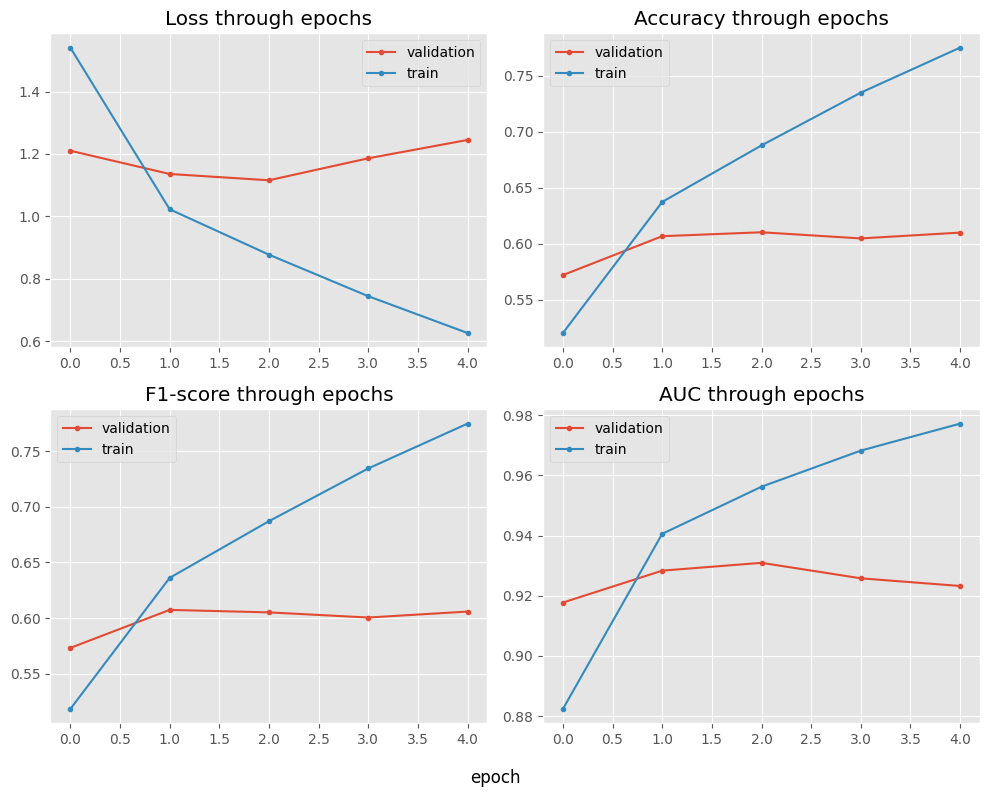

In [172]:
plot_results()

Показники якості на тестовій множині:

In [173]:
y_pred_ = resnet152_new.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 153ms/step


In [174]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.6133
Precision: 0.6170628057170006
Recall: 0.6133
F1-score: 0.6095811723380035
AUC: 0.9261317333333332


Декілька класифікацій зображень:

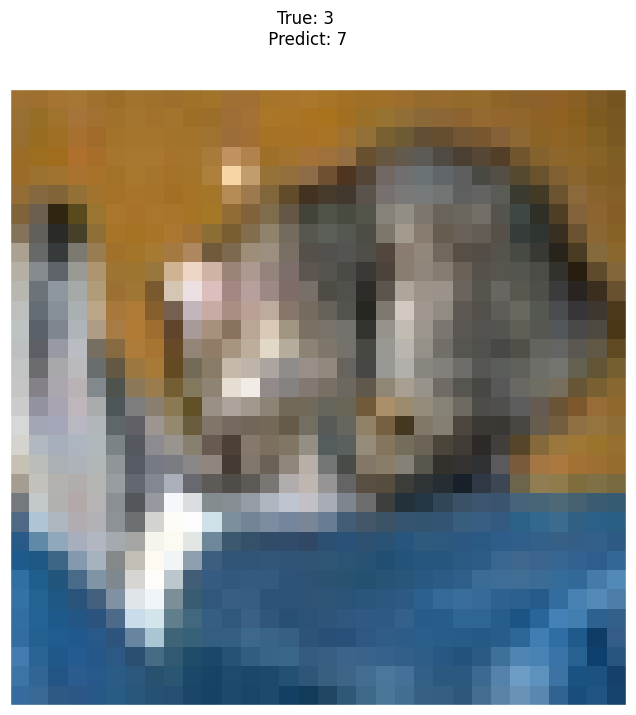

In [175]:
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[0][0]}\n Predict: {y_pred[0]}")
plt.show()

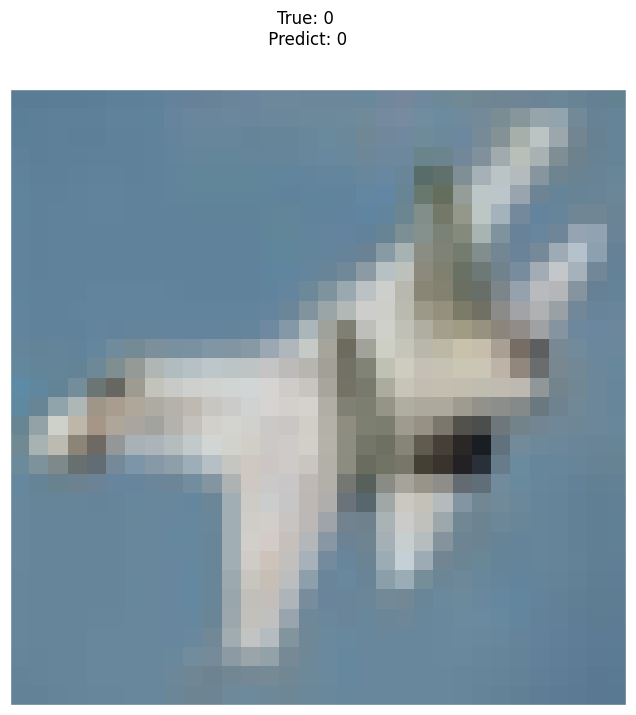

In [176]:
plt.imshow(x_test[10])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[10][0]}\n Predict: {y_pred[10]}")
plt.show()

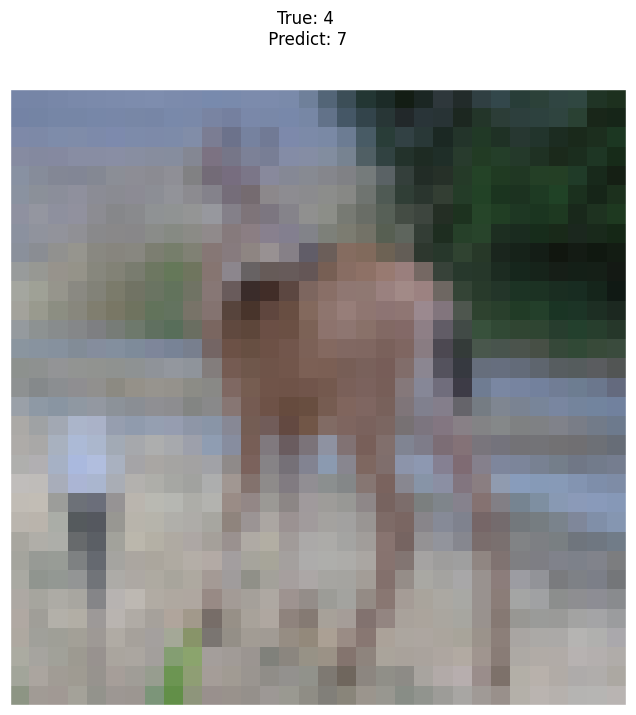

In [177]:
plt.imshow(x_test[100])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[100][0]}\n Predict: {y_pred[100]}")
plt.show()

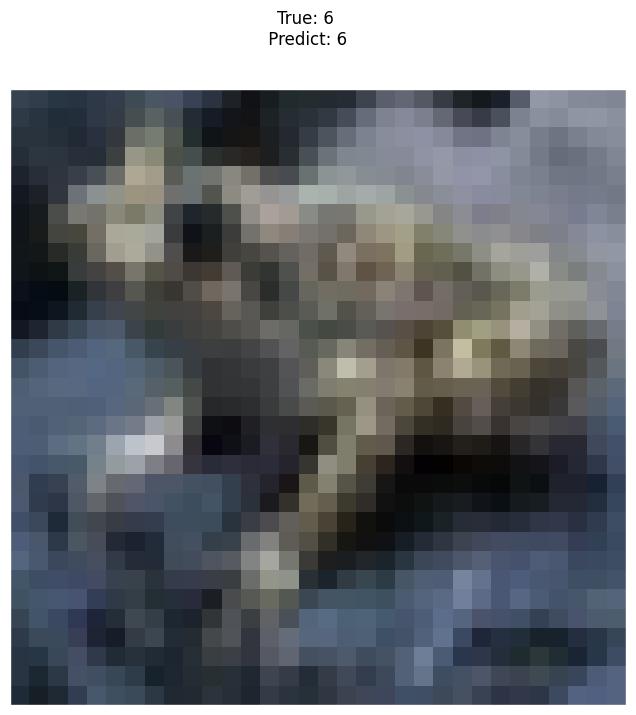

In [178]:
plt.imshow(x_test[152])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[152][0]}\n Predict: {y_pred[152]}")
plt.show()

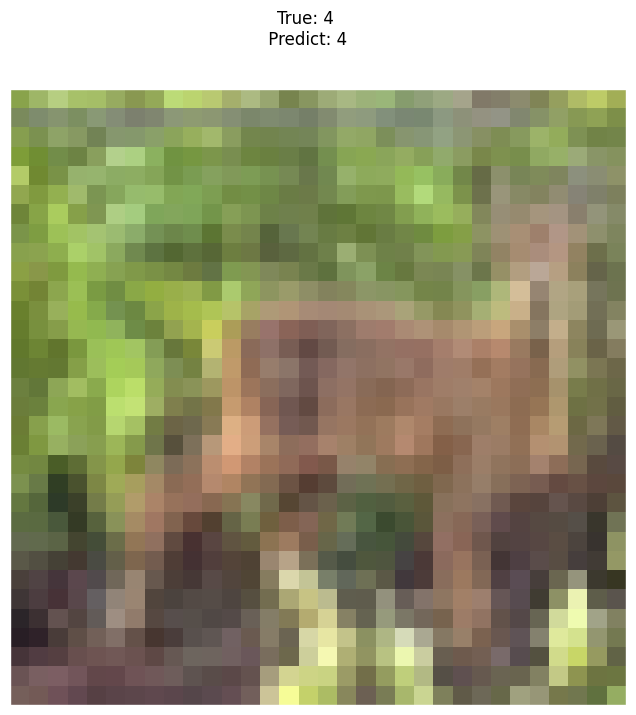

In [179]:
plt.imshow(x_test[2500])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[2500][0]}\n Predict: {y_pred[2500]}")
plt.show()

##### DenseNet201:

In [180]:
densenet201_new = add_top_layer(densenet201_model, (1024, 512), "relu")

In [181]:
densenet201_new.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", F1Score(average="weighted"), AUC()])

In [182]:
densenet201_new.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 122s 674ms/step - accuracy: 0.3138 - auc_16: 0.7201 - f1_score: 0.3115 - loss: 3.5041 - val_accuracy: 0.5041 - val_auc_16: 0.8873 - val_f1_score: 0.4961 - val_loss: 1.4082
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 105s 671ms/step - accuracy: 0.5251 - auc_16: 0.8979 - f1_score: 0.5226 - loss: 1.3369 - val_accuracy: 0.5384 - val_auc_16: 0.9011 - val_f1_score: 0.5353 - val_loss: 1.3220
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 679ms/step - accuracy: 0.5686 - auc_16: 0.9156 - f1_score: 0.5672 - loss: 1.2195 - val_accuracy: 0.5553 - val_auc_16: 0.9076 - val_f1_score: 0.5513 - val_loss: 1.2814
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 679ms/step - accuracy: 0.5932 - auc_16: 0.9256 - f1_score: 0.5913 - loss: 1.1458 - val_accuracy: 0.5451 - val_auc_16: 0.9078 - val_f1_score: 0.5445 - val_loss: 1.2865
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 107s 680ms/step - accuracy: 0.6192 - auc_16: 0.9337 - f1_score: 0.6177 - loss: 1.0819 - val_accuracy: 0.5636 - val_au

Зміна функції втрат та показників якості:

In [183]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab5/log

Reusing TensorBoard on port 6007 (pid 8771), started 2:14:17 ago. (Use '!kill 8771' to kill it.)

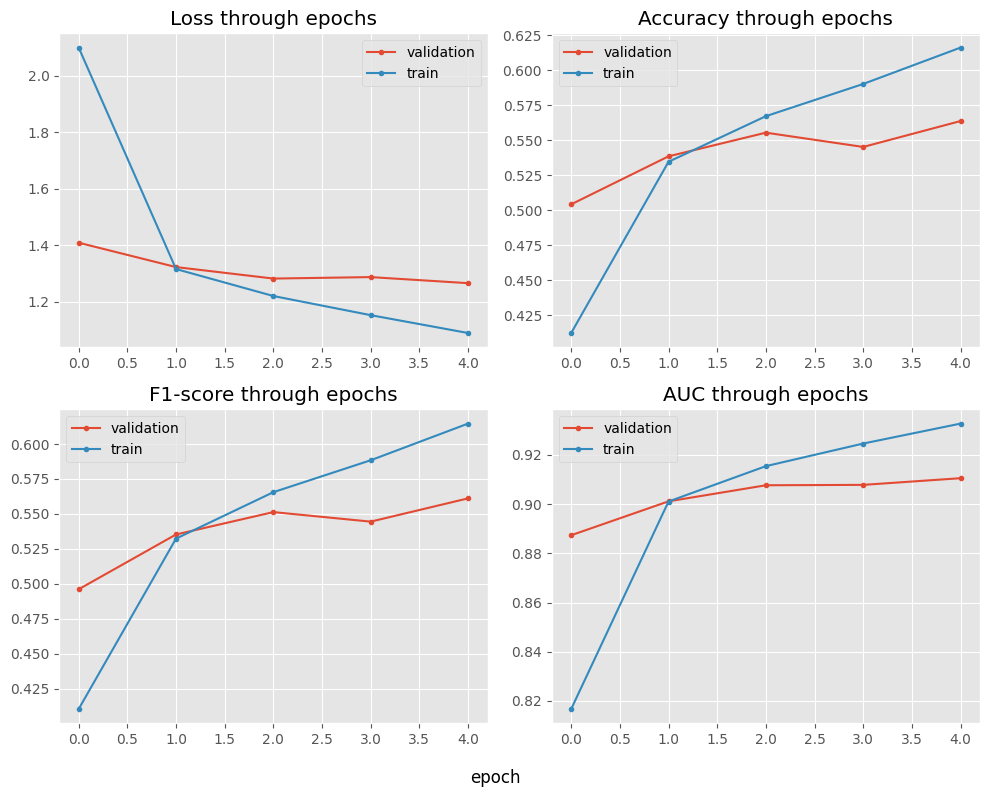

In [184]:
plot_results()

Показники якості на тестовій множині:

In [185]:
y_pred_ = densenet201_new.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step


In [186]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.5515
Precision: 0.5568556566011572
Recall: 0.5515
F1-score: 0.5482176344385047
AUC: 0.9091840944444444


Декілька класифікацій зображень:

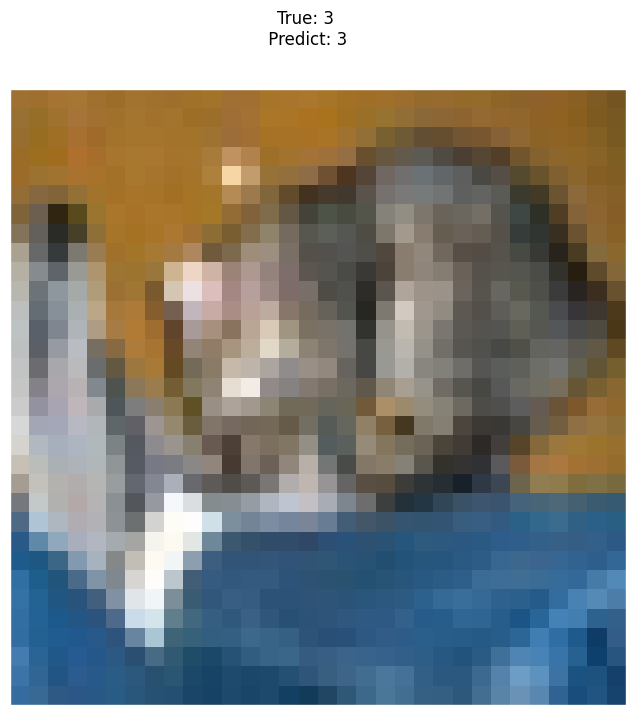

In [187]:
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[0][0]}\n Predict: {y_pred[0]}")
plt.show()

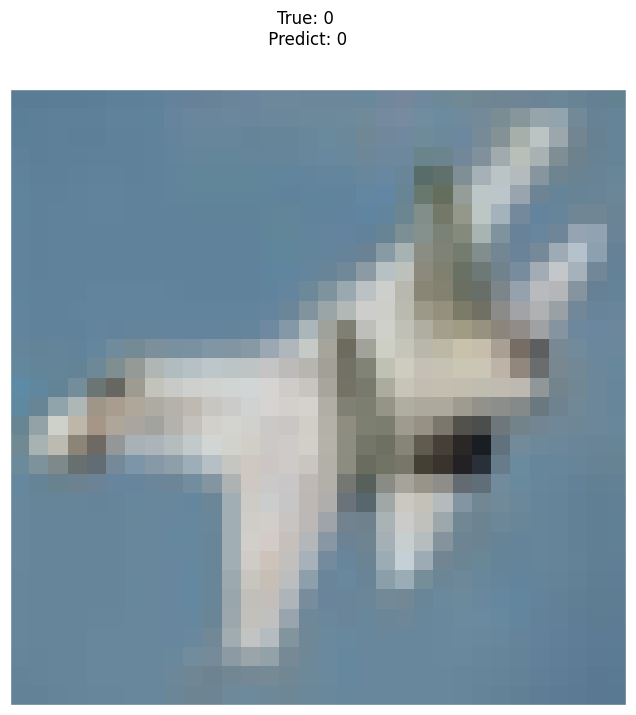

In [188]:
plt.imshow(x_test[10])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[10][0]}\n Predict: {y_pred[10]}")
plt.show()

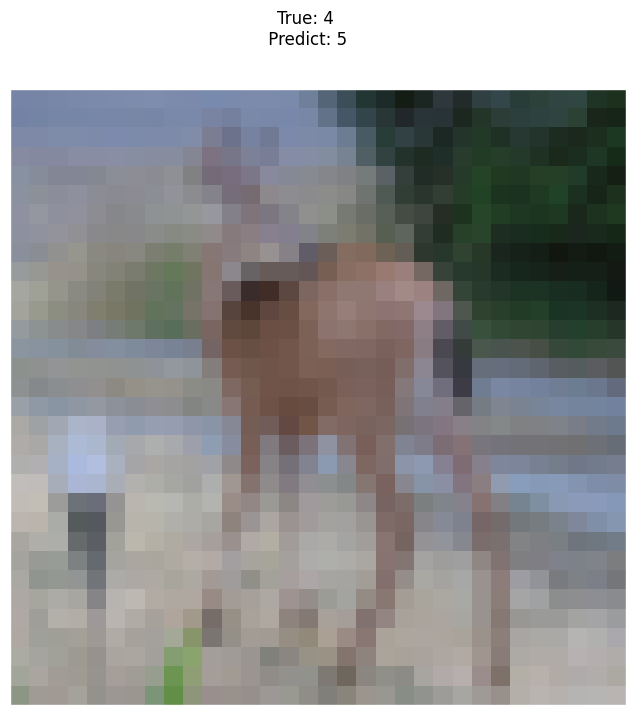

In [189]:
plt.imshow(x_test[100])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[100][0]}\n Predict: {y_pred[100]}")
plt.show()

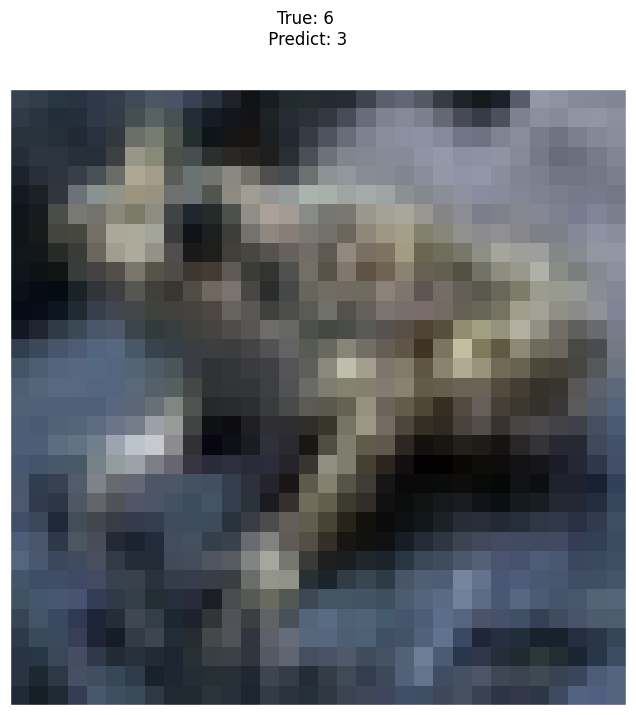

In [190]:
plt.imshow(x_test[152])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[152][0]}\n Predict: {y_pred[152]}")
plt.show()

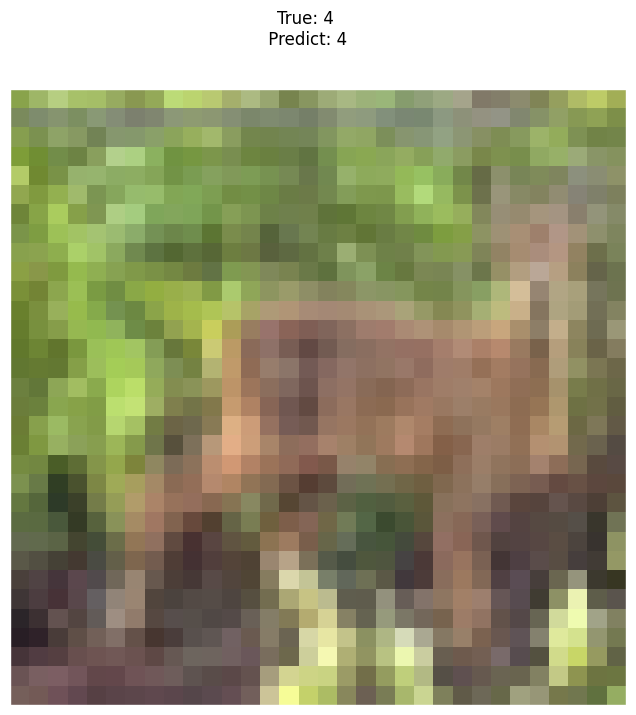

In [191]:
plt.imshow(x_test[2500])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[2500][0]}\n Predict: {y_pred[2500]}")
plt.show()

##### EfficientNetB7:

In [16]:
efficientnetb7_new = add_top_layer(efficientnetb7_model, (1024, 512), "relu")

In [17]:
efficientnetb7_new.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", F1Score(average="weighted"), AUC()])

In [18]:
efficientnetb7_new.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2, callbacks=[tensorboard_callback], verbose=1);

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.1024 - auc: 0.5018 - f1_score: 0.0989 - loss: 9.8839 - val_accuracy: 0.1015 - val_auc: 0.5079 - val_f1_score: 0.0254 - val_loss: 2.3265
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.1063 - auc: 0.5089 - f1_score: 0.0989 - loss: 2.3423 - val_accuracy: 0.1225 - val_auc: 0.5243 - val_f1_score: 0.0419 - val_loss: 2.3100
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.1104 - auc: 0.5188 - f1_score: 0.1007 - loss: 2.3136 - val_accuracy: 0.0980 - val_auc: 0.5172 - val_f1_score: 0.0175 - val_loss: 2.3096
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.1095 - auc: 0.5168 - f1_score: 0.0911 - loss: 2.3049 - val_accuracy: 0.0997 - val_auc: 0.5011 - val_f1_score: 0.0181 - val_loss: 2.3026
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.0974 - auc: 0.5006 - f1_score: 0.0433 - loss: 2.3027 - val_accuracy: 0.1003 - val_auc: 0.5002 - val_f1_score: 0.0183 - val_los

Зміна функції втрат та показників якості:

In [19]:
%tensorboard --logdir /home/ilyahl/Documents/Education/bachelor/3_course/2_semester/decision_support_systems/lab5/log

Reusing TensorBoard on port 6007 (pid 8771), started 2:50:30 ago. (Use '!kill 8771' to kill it.)

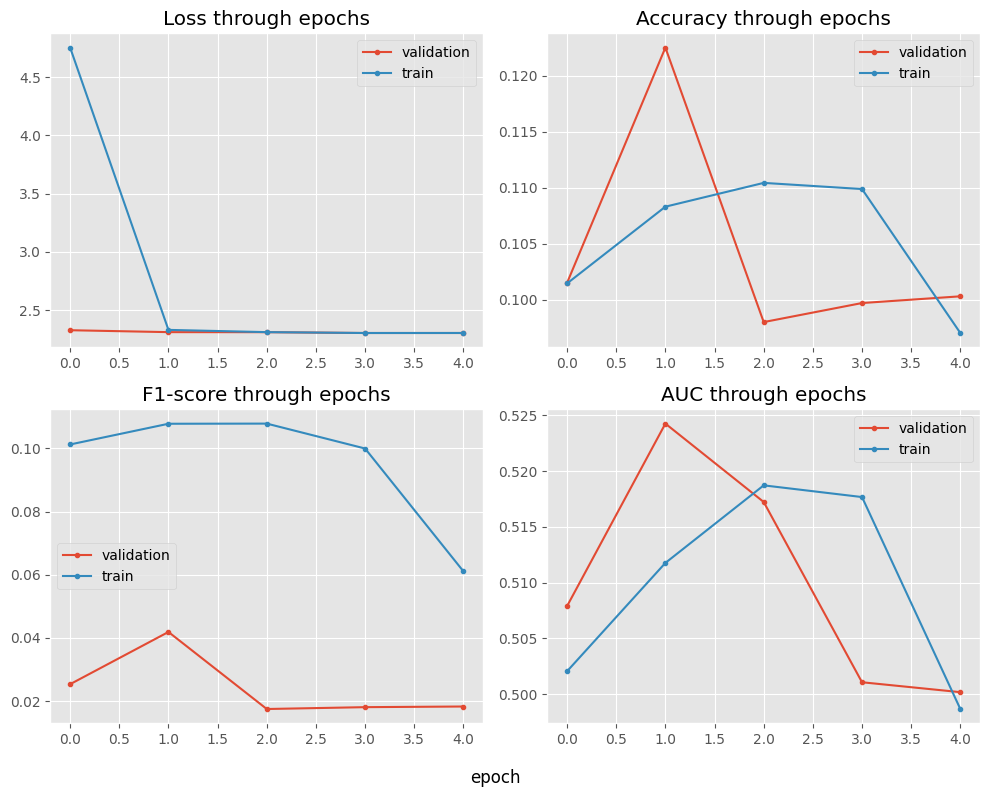

In [20]:
plot_results()

Показники якості на тестовій множині:

In [21]:
y_pred_ = efficientnetb7_new.predict(x_test)
y_pred = np.argmax(y_pred_, axis=1)
y_true = np.reshape(y_test, (1, -1))[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 206ms/step


In [22]:
print("Model quality on test set:")
print(f"Accuracy: {metrics.accuracy_score(y_true, y_pred)}")
print(f"Precision: {metrics.precision_score(y_true, y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_true, y_pred, average='weighted')}")
print(f"F1-score: {metrics.f1_score(y_true, y_pred, average='weighted')}")
print(f"AUC: {metrics.roc_auc_score(y_true, y_pred_, multi_class='ovo')}")

Model quality on test set:
Accuracy: 0.1
Precision: 0.01
Recall: 0.1
F1-score: 0.01818181818181818
AUC: 0.5


/home/ilyahl/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Декілька класифікацій зображень:

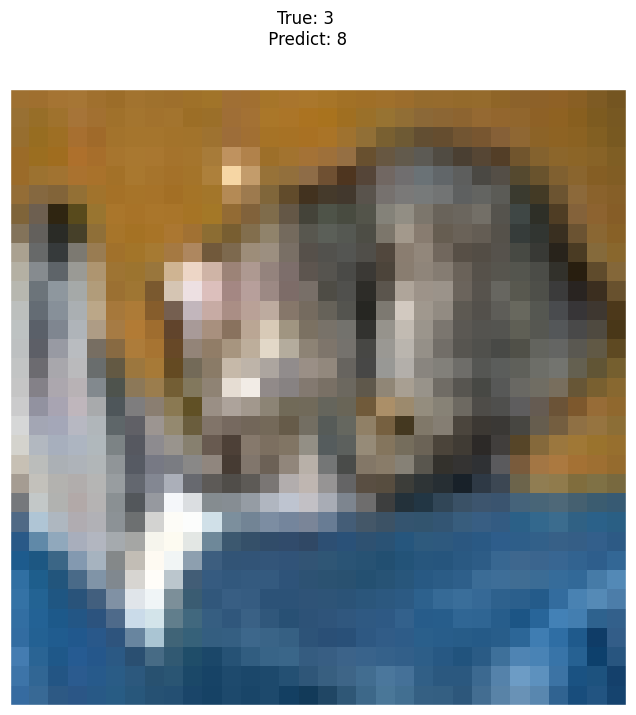

In [23]:
plt.imshow(x_test[0])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[0][0]}\n Predict: {y_pred[0]}")
plt.show()

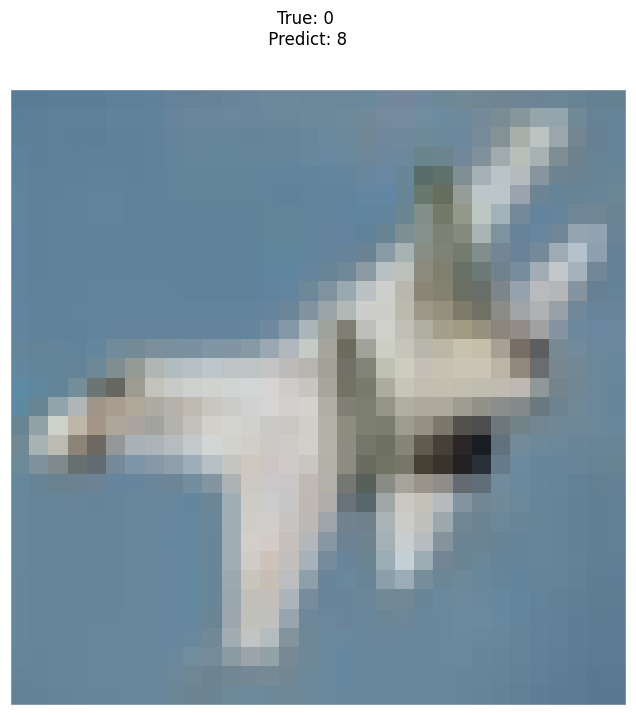

In [24]:
plt.imshow(x_test[10])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[10][0]}\n Predict: {y_pred[10]}")
plt.show()

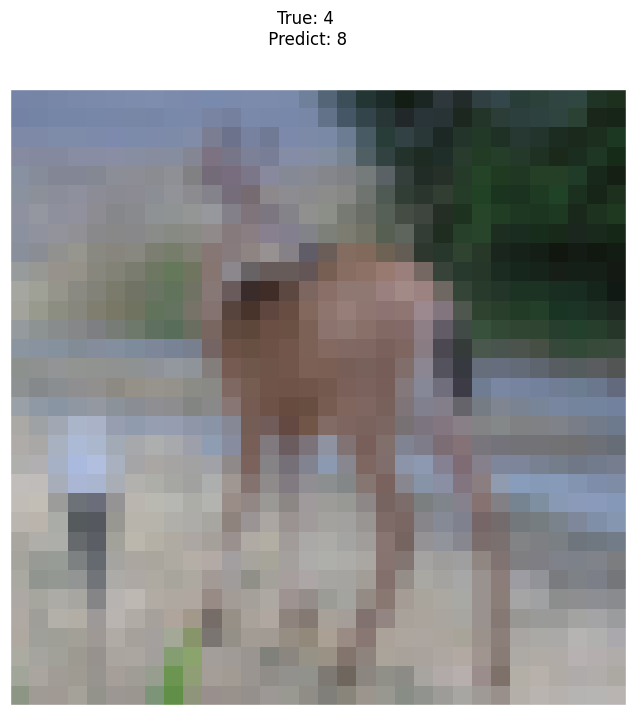

In [25]:
plt.imshow(x_test[100])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[100][0]}\n Predict: {y_pred[100]}")
plt.show()

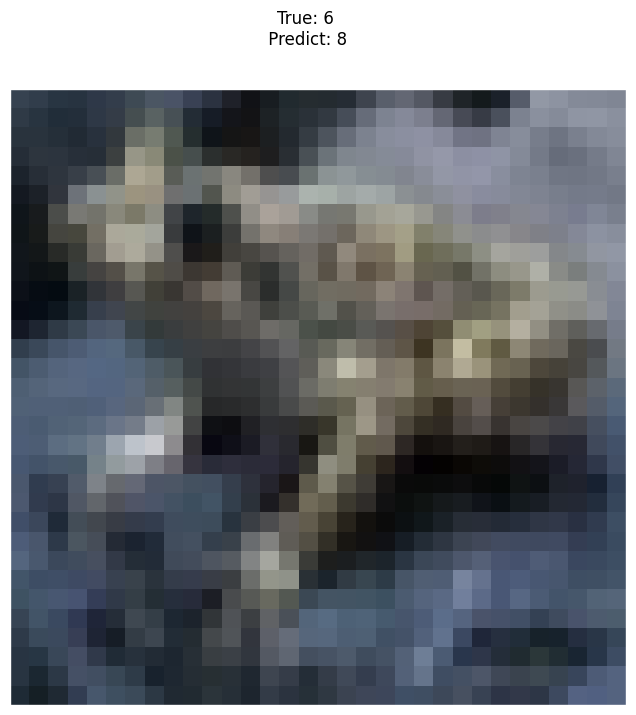

In [26]:
plt.imshow(x_test[152])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[152][0]}\n Predict: {y_pred[152]}")
plt.show()

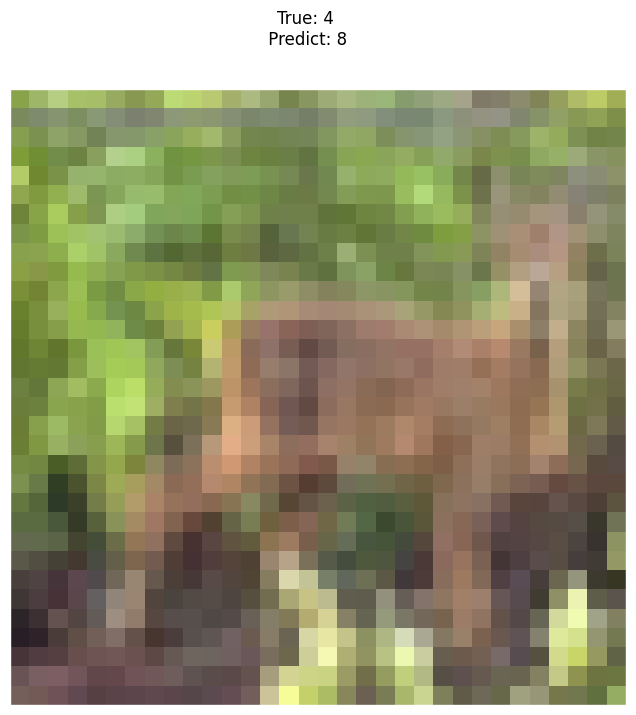

In [27]:
plt.imshow(x_test[2500])
plt.xticks([])
plt.yticks([])
plt.suptitle(f"True: {y_test[2500][0]}\n Predict: {y_pred[2500]}")
plt.show()

Таким чином, архітектура EfficientNet взагалі не підійшла для нашої задачі. Архітектура ResNet показала найкращі результати за 5 епох.